<a href="https://colab.research.google.com/github/Tanmoy-94/Structural-Dynamics-/blob/main/LCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from numpy.linalg import det, inv, pinv # Import pinv here


# Example Life Cycle Inventory (LCI) data as a dictionary
lci_data = {
    'process': ['Process 1', 'Process 2', 'Process 3'],
    'CO2': [100, 50, 200],   # in kg
    'CH4': [0.2, 0.1, 0.3],  # in kg
    'SO2': [0.05, 0.02, 0.1], # in kg
    'NOx': [0.1, 0.05, 0.2]  # in kg
}

# Example Characterization Factors (CF) data as a dictionary
cf_data = {
    'flow': ['CO2', 'CH4', 'SO2', 'NOx'],
    'GWP100': [1.0, 25.0, 0, 0],    # Global Warming Potential, kg CO2-eq
    'AP': [0, 0, 1.0, 0],           # Acidification Potential, kg SO2-eq
    'EP': [0, 0, 0, 1.0]            # Eutrophication Potential, kg NOx-eq
}

# Convert dictionaries to pandas DataFrames
lci_df = pd.DataFrame(lci_data)
cf_df = pd.DataFrame(cf_data)

# Display the dataframes (optional)
print("Life Cycle Inventory (LCI):\n", lci_df)
print("\nCharacterization Factors (CF):\n", cf_df)

# Apply Characterization Factors to the LCI data
# For each environmental impact category (GWP100, AP, EP), multiply the emissions by the CF

# Global Warming Potential (GWP100)
lci_df['GWP100_impact'] = lci_df['CO2'] * cf_df.loc[cf_df['flow'] == 'CO2', 'GWP100'].values[0] + \
                          lci_df['CH4'] * cf_df.loc[cf_df['flow'] == 'CH4', 'GWP100'].values[0]

# Acidification Potential (AP)
lci_df['AP_impact'] = lci_df['SO2'] * cf_df.loc[cf_df['flow'] == 'SO2', 'AP'].values[0]

# Eutrophication Potential (EP)
lci_df['EP_impact'] = lci_df['NOx'] * cf_df.loc[cf_df['flow'] == 'NOx', 'EP'].values[0]

# Sum the impacts across all processes for each category
total_GWP100 = lci_df['GWP100_impact'].sum()
total_AP = lci_df['AP_impact'].sum()
total_EP = lci_df['EP_impact'].sum()

# Output the results
print(f'\nTotal Global Warming Potential (GWP100): {total_GWP100:.2f} kg CO₂-eq')
print(f'Total Acidification Potential (AP): {total_AP:.2f} kg SO₂-eq')
print(f'Total Eutrophication Potential (EP): {total_EP:.2f} kg NOₓ-eq')

# Display the final LCI with impact assessment results (optional)
print("\nLCI with Environmental Impacts:\n", lci_df)


Life Cycle Inventory (LCI):
      process  CO2  CH4   SO2   NOx
0  Process 1  100  0.2  0.05  0.10
1  Process 2   50  0.1  0.02  0.05
2  Process 3  200  0.3  0.10  0.20

Characterization Factors (CF):
   flow  GWP100   AP   EP
0  CO2     1.0  0.0  0.0
1  CH4    25.0  0.0  0.0
2  SO2     0.0  1.0  0.0
3  NOx     0.0  0.0  1.0

Total Global Warming Potential (GWP100): 365.00 kg CO₂-eq
Total Acidification Potential (AP): 0.17 kg SO₂-eq
Total Eutrophication Potential (EP): 0.35 kg NOₓ-eq

LCI with Environmental Impacts:
      process  CO2  CH4   SO2   NOx  GWP100_impact  AP_impact  EP_impact
0  Process 1  100  0.2  0.05  0.10          105.0       0.05       0.10
1  Process 2   50  0.1  0.02  0.05           52.5       0.02       0.05
2  Process 3  200  0.3  0.10  0.20          207.5       0.10       0.20


In [ ]:
!pip install brightway2


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 17.0 MB/s 

Baseline Impacts (ReCiPe): [10000.   302.    40.    70.]


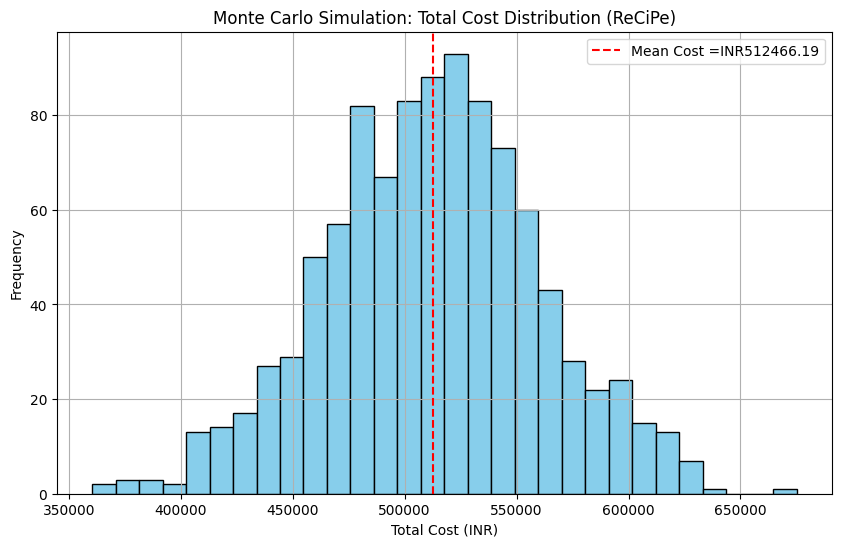

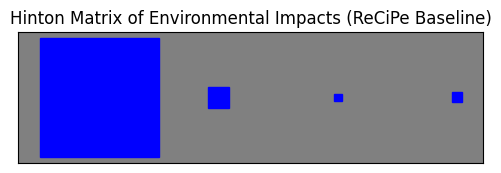

                Impact Category   Mean Impact  Standard Deviation  \
0                Global Warming  10030.623913          963.437055   
1                 Acidification    302.749820           30.543623   
2                Eutrophication     39.966979            4.022289   
3  Particulate Matter Formation     70.210603            7.045223   

   Cost per Impact      Mean Cost  
0               50  501531.195671  
1               30    9082.494603  
2               20     799.339585  
3               15    1053.159039  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Step 1: Define inventory data for the coal mining plant (e.g., emissions in kg)
# These are example values and should be replaced with actual inventory data
inventory_data = {
    'CO2': 10000,  # in kg
    'SO2': 500,    # in kg
    'NOx': 200,    # in kg
    'PM10': 100    # in kg
}

# Step 2: Define the ReCiPe Midpoint characterization factors for each impact category
# (these are hypothetical values for ReCiPe Midpoint, replace with actual data from ReCiPe)
recipe_characterization_factors = {
    'Global Warming': {'CO2': 1.0, 'SO2': 0, 'NOx': 0, 'PM10': 0},       # kg CO2-eq
    'Acidification': {'CO2': 0, 'SO2': 0.48, 'NOx': 0.31, 'PM10': 0},   # kg SO2-eq
    'Eutrophication': {'CO2': 0, 'SO2': 0, 'NOx': 0.2, 'PM10': 0},      # kg N-eq
    'Particulate Matter Formation': {'CO2': 0, 'SO2': 0, 'NOx': 0.05, 'PM10': 0.6},  # kg PM10-eq
}

# Step 3: Perform LCIA Calculation (Impact = Inventory × Characterization Factor)
impact_categories = list(recipe_characterization_factors.keys())
baseline_impacts = []

for category in impact_categories:
    impact = sum(inventory_data[emission] * recipe_characterization_factors[category][emission] for emission in inventory_data)
    baseline_impacts.append(impact)

baseline_impacts = np.array(baseline_impacts)
print(f"Baseline Impacts (ReCiPe): {baseline_impacts}")

# Step 4: Define Monte Carlo Simulation Parameters
n_simulations = 1000
impact_uncertainty = 0.1  # 10% variability in the emissions

# Simulate impacts using Monte Carlo (assuming normal distribution for uncertainties)
np.random.seed(42)
simulated_impacts = np.random.normal(loc=baseline_impacts, scale=impact_uncertainty * baseline_impacts, size=(n_simulations, len(impact_categories)))

# Step 5: Define cost data (hypothetical values in $ per unit of impact)
impact_costs = np.array([50, 30, 20, 15])  # Cost per unit for each impact category
simulated_costs = simulated_impacts * impact_costs
total_cost_per_sim = simulated_costs.sum(axis=1)
mean_total_cost = total_cost_per_sim.mean()

# Step 6: Plot the cost distribution
plt.figure(figsize=(10, 6))
plt.hist(total_cost_per_sim, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_total_cost, color='red', linestyle='--', label=f'Mean Cost =INR{mean_total_cost:.2f}')
plt.title('Monte Carlo Simulation: Total Cost Distribution (ReCiPe)')
plt.xlabel('Total Cost (INR)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Hinton Matrix for Environmental Impacts Visualization
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    if ax is None:
        ax = plt.gca()

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    for (x, y), w in np.ndenumerate(matrix):
        color = 'blue' if w > 0 else 'white'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

# Normalize impacts for Hinton matrix
normalized_impacts = baseline_impacts / baseline_impacts.max()

# Step 8: Visualize Hinton Matrix for Baseline Impacts
plt.figure(figsize=(6, 6))
hinton(normalized_impacts[:, np.newaxis])  # Convert to column matrix
plt.title('Hinton Matrix of Environmental Impacts (ReCiPe Baseline)')
plt.show()

# Step 9: Summarize key findings
mean_impact = simulated_impacts.mean(axis=0)
std_impact = simulated_impacts.std(axis=0)

summary_df = pd.DataFrame({
    'Impact Category': impact_categories,
    'Mean Impact': mean_impact,
    'Standard Deviation': std_impact,
    'Cost per Impact': impact_costs,
    'Mean Cost': mean_impact * impact_costs
})

print(summary_df)

# Optional: Export summary to CSV
summary_df.to_csv('LCIA_summary_ReCiPe_coal_mining.csv', index=False)
